## 1. Importing Data and Required Librarires

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
! pip install openpyxl

In [5]:
df = pd.read_csv("/Users/harshitha/Desktop/Population Analysis/countries-table.csv")


In [6]:
df.head()


,place,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,unMember,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,696828385.0,1.059634e+09,1.240614e+09,1.428628e+09,1.441720e+09,1.514994e+09,1.670491e+09,India,3287590.0,2973190.0,IN,IND,True,0.4114,0.0092,0.1801,484.9067,1255.9084,1
1,156,982372466.0,1.264099e+09,1.348191e+09,1.425671e+09,1.425179e+09,1.415606e+09,1.312636e+09,China,9706961.0,9424702.9,CN,CHN,True,-0.0199,-0.0003,0.1780,151.2174,391.6530,2
2,840,223140018.0,2.823986e+08,3.111828e+08,3.399966e+08,3.418144e+08,3.521623e+08,3.753920e+08,United States,9372610.0,9147420.0,US,USA,True,0.0571,0.0053,0.0427,37.3673,96.7813,3
3,360,148177096.0,2.140724e+08,2.440162e+08,2.775341e+08,2.797980e+08,2.921501e+08,3.172252e+08,Indonesia,1904569.0,1877519.0,ID,IDN,True,0.0707,0.0082,0.0350,149.0254,385.9758,4
4,586,80624057.0,1.543699e+08,1.944545e+08,2.404857e+08,2.452098e+08,2.740298e+08,3.678085e+08,Pakistan,881912.0,770880.0,PK,PAK,True,0.1499,0.0196,0.0306,318.0908,823.8551,5


## 2. Data Cleaning and Preparation

In [44]:
columns_to_remove = ['place', 'pop1980', 'pop2000', 'pop2010', 'pop2030', 'pop2050', 'cca2', 'cca3', 'unMember', 'densityMi', 'netChange']

df3 = df.drop(columns=columns_to_remove, errors='ignore')


### I intend to extract only the necessary columns for analysis and establish a new data frame named 'df2'.

In [45]:
df3.head()

,pop2023,pop2024,country,area,landAreaKm,growthRate,worldPercentage,density,rank
0,1.428628e+09,1.441720e+09,India,3287590.0,2973190.0,0.0092,0.1801,484.9067,1
1,1.425671e+09,1.425179e+09,China,9706961.0,9424702.9,-0.0003,0.1780,151.2174,2
2,3.399966e+08,3.418144e+08,United States,9372610.0,9147420.0,0.0053,0.0427,37.3673,3
3,2.775341e+08,2.797980e+08,Indonesia,1904569.0,1877519.0,0.0082,0.0350,149.0254,4
4,2.404857e+08,2.452098e+08,Pakistan,881912.0,770880.0,0.0196,0.0306,318.0908,5


In [46]:
# Checking the datatypes of all the columns

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pop2023          234 non-null    float64
 1   pop2024          234 non-null    float64
 2   country          234 non-null    object 
 3   area             234 non-null    float64
 4   landAreaKm       234 non-null    float64
 5   growthRate       234 non-null    float64
 6   worldPercentage  228 non-null    float64
 7   density          234 non-null    float64
 8   rank             234 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 16.6+ KB


### Renaming the column names

In [47]:
df3.rename(columns={
    'density': 'Density',
    'rank': 'Rank',
    'pop2023': '2023_Population',
    'pop2024': '2024_Population',
    'country': 'Country',
    'area': 'Area',
    'landAreaKm': 'LandArea',
    'growthRate': 'Growth Rate',
    'worldPercentage': 'World Percentage'
}, inplace=True)

df3.head()

,2023_Population,2024_Population,Country,Area,LandArea,Growth Rate,World Percentage,Density,Rank
0,1.428628e+09,1.441720e+09,India,3287590.0,2973190.0,0.0092,0.1801,484.9067,1
1,1.425671e+09,1.425179e+09,China,9706961.0,9424702.9,-0.0003,0.1780,151.2174,2
2,3.399966e+08,3.418144e+08,United States,9372610.0,9147420.0,0.0053,0.0427,37.3673,3
3,2.775341e+08,2.797980e+08,Indonesia,1904569.0,1877519.0,0.0082,0.0350,149.0254,4
4,2.404857e+08,2.452098e+08,Pakistan,881912.0,770880.0,0.0196,0.0306,318.0908,5


In [48]:
# Sorting index

df3.sort_index(inplace = True)

In [49]:
# Coverting column names into title case

df3.columns = df3.columns.str.title()

In [50]:
df3.isna().sum()

2023_Population     0
2024_Population     0
Country             0
Area                0
Landarea            0
Growth Rate         0
World Percentage    6
Density             0
Rank                0
dtype: int64

### Checking for missing values

In [51]:
df3["World Percentage"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
229     True
230     True
231     True
232     True
233     True
Name: World Percentage, Length: 234, dtype: bool

In [52]:
# Creating a new variables consisiting of only the missing value rows

missing_rows = df3[df3["World Percentage"].isna()]
missing_rows

,2023_Population,2024_Population,Country,Area,Landarea,Growth Rate,World Percentage,Density,Rank
228,5840.0,5815.0,Saint Pierre and Miquelon,242.00,242.00,-0.0043,NaN,24.0289,229
229,4386.0,4372.0,Montserrat,102.00,102.00,-0.0032,NaN,42.8627,230
230,3791.0,3803.0,Falkland Islands,12173.00,12173.00,0.0032,NaN,0.3124,231
231,1935.0,1935.0,Niue,261.00,261.00,0.0000,NaN,7.4138,232
232,1893.0,1915.0,Tokelau,12.00,10.00,0.0116,NaN,191.5000,233
233,518.0,526.0,Vatican City,0.44,0.44,0.0154,NaN,1195.4545,234


#### The "World percentage" of every country can be calculated using the value of "Total World Population". But as the population of these countries is very less, the world percentage value is negligible. 

In [54]:
# Replacing NaN with 0

df3["World Percentage"].fillna(0,inplace = True)

In [55]:
# Checking the newly filled rows

specific_rows = df3.iloc[[228, 229, 230, 231, 232, 233]]
specific_rows

,2023_Population,2024_Population,Country,Area,Landarea,Growth Rate,World Percentage,Density,Rank
228,5840.0,5815.0,Saint Pierre and Miquelon,242.00,242.00,-0.0043,0.0,24.0289,229
229,4386.0,4372.0,Montserrat,102.00,102.00,-0.0032,0.0,42.8627,230
230,3791.0,3803.0,Falkland Islands,12173.00,12173.00,0.0032,0.0,0.3124,231
231,1935.0,1935.0,Niue,261.00,261.00,0.0000,0.0,7.4138,232
232,1893.0,1915.0,Tokelau,12.00,10.00,0.0116,0.0,191.5000,233
233,518.0,526.0,Vatican City,0.44,0.44,0.0154,0.0,1195.4545,234


In [56]:
# Verifying that there are no more missing values

df3.isna().sum()

2023_Population     0
2024_Population     0
Country             0
Area                0
Landarea            0
Growth Rate         0
World Percentage    0
Density             0
Rank                0
dtype: int64

### Checking for Duplicate Values

In [57]:
df3[df3.duplicated()]   #We can see below that there are No duplicate values

,2023_Population,2024_Population,Country,Area,Landarea,Growth Rate,World Percentage,Density,Rank


In [58]:
# Renaming the columns again

df3.rename(columns={
    'Density': 'Density(/km²)',
    'Area': 'Area(km²)',
    'Land Area(km)': 'Land Area(km²)',
}, inplace=True)

df3.head()

,2023_Population,2024_Population,Country,Area(km²),Landarea,Growth Rate,World Percentage,Density(/km²),Rank
0,1.428628e+09,1.441720e+09,India,3287590.0,2973190.0,0.0092,0.1801,484.9067,1
1,1.425671e+09,1.425179e+09,China,9706961.0,9424702.9,-0.0003,0.1780,151.2174,2
2,3.399966e+08,3.418144e+08,United States,9372610.0,9147420.0,0.0053,0.0427,37.3673,3
3,2.775341e+08,2.797980e+08,Indonesia,1904569.0,1877519.0,0.0082,0.0350,149.0254,4
4,2.404857e+08,2.452098e+08,Pakistan,881912.0,770880.0,0.0196,0.0306,318.0908,5


### Converting the columns to their respective Datatypes

In [59]:
# Converting population columns from float to int datatype

population_columns = ['2023_Population', '2024_Population']

# Convert columns from float to int, handling missing values

for column in population_columns:
    if column in df3:
        df3[column] = df3[column].fillna(0).astype(int)

df3.head()

,2023_Population,2024_Population,Country,Area(km²),Landarea,Growth Rate,World Percentage,Density(/km²),Rank
0,1428627663,1441719852,India,3287590.0,2973190.0,0.0092,0.1801,484.9067,1
1,1425671352,1425178782,China,9706961.0,9424702.9,-0.0003,0.1780,151.2174,2
2,339996563,341814420,United States,9372610.0,9147420.0,0.0053,0.0427,37.3673,3
3,277534122,279798049,Indonesia,1904569.0,1877519.0,0.0082,0.0350,149.0254,4
4,240485658,245209815,Pakistan,881912.0,770880.0,0.0196,0.0306,318.0908,5


### Reordering the columns

In [60]:
# Define the new order of the columns

new_column_order = [
    'Country', '2023_Population', '2024_Population', 'Area(km²)', 'Growth Rate', 'World Percentage',
    'Density(/km²)', 'Rank'
]

# Reorder the columns

df3 = df3[new_column_order]

df3.head()

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,India,1428627663,1441719852,3287590.0,0.0092,0.1801,484.9067,1
1,China,1425671352,1425178782,9706961.0,-0.0003,0.1780,151.2174,2
2,United States,339996563,341814420,9372610.0,0.0053,0.0427,37.3673,3
3,Indonesia,277534122,279798049,1904569.0,0.0082,0.0350,149.0254,4
4,Pakistan,240485658,245209815,881912.0,0.0196,0.0306,318.0908,5


## 3. Exploratory Data Analysis and Visualization

In [61]:
# Deploying .decribe() method to obtain aggegated values of numeric columns
# Deploying T attribute to Transpose rows and columns

df3.describe().T

,count,mean,std,min,25%,50%,75%,max
2023_Population,234.0,3.437442e+07,1.373864e+08,518.0000,422598.250000,5.643895e+06,2.324537e+07,1.428628e+09
2024_Population,234.0,3.468862e+07,1.380750e+08,526.0000,426456.500000,5.626359e+06,2.392272e+07,1.441720e+09
Area(km²),234.0,5.814500e+05,1.761841e+06,0.4400,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07
Growth Rate,234.0,9.200427e-03,1.137134e-02,-0.0309,0.001925,7.950000e-03,1.567500e-02,4.830000e-02
World Percentage,234.0,4.332479e-03,1.724727e-02,0.0000,0.000100,7.000000e-04,3.000000e-03,1.801000e-01
Density(/km²),234.0,4.538142e+02,1.990152e+03,0.1384,39.801175,9.828740e+01,2.482232e+02,2.167422e+04
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02


**Following points can be inferred:**

* Dataset contains facts and figures regarding population of 235 countries and dependencies for Years 2023 and 2024
* Rank to each country is assigned as per their population
* Country with rank 1 is designated as most populous country
* Growth rate ranges from -0.0309 to 4.83.
* Positive growth rate denotes increase in population
* Most crowded country accounts for 18.01 percentage of world's total population

### a)Total World Population as of January  2024

In [95]:
df3["2024_Population"].sum()

8117135982

### b) Top 10 highly populated Countries

In [62]:
# Retrieving top 10 records

a1 = df3.head(10)
a1

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,India,1428627663,1441719852,3287590.0,0.0092,0.1801,484.9067,1
1,China,1425671352,1425178782,9706961.0,-0.0003,0.1780,151.2174,2
2,United States,339996563,341814420,9372610.0,0.0053,0.0427,37.3673,3
3,Indonesia,277534122,279798049,1904569.0,0.0082,0.0350,149.0254,4
4,Pakistan,240485658,245209815,881912.0,0.0196,0.0306,318.0908,5
5,Nigeria,223804632,229152217,923768.0,0.0239,0.0286,251.6027,6
6,Brazil,216422446,217637297,8515767.0,0.0056,0.0272,26.0390,7
7,Bangladesh,172954319,174701211,147570.0,0.0101,0.0218,1342.1004,8
8,Russia,144444359,143957079,17098242.0,-0.0034,0.0180,8.7903,9
9,Ethiopia,126527060,129719719,1104300.0,0.0252,0.0162,114.9415,10


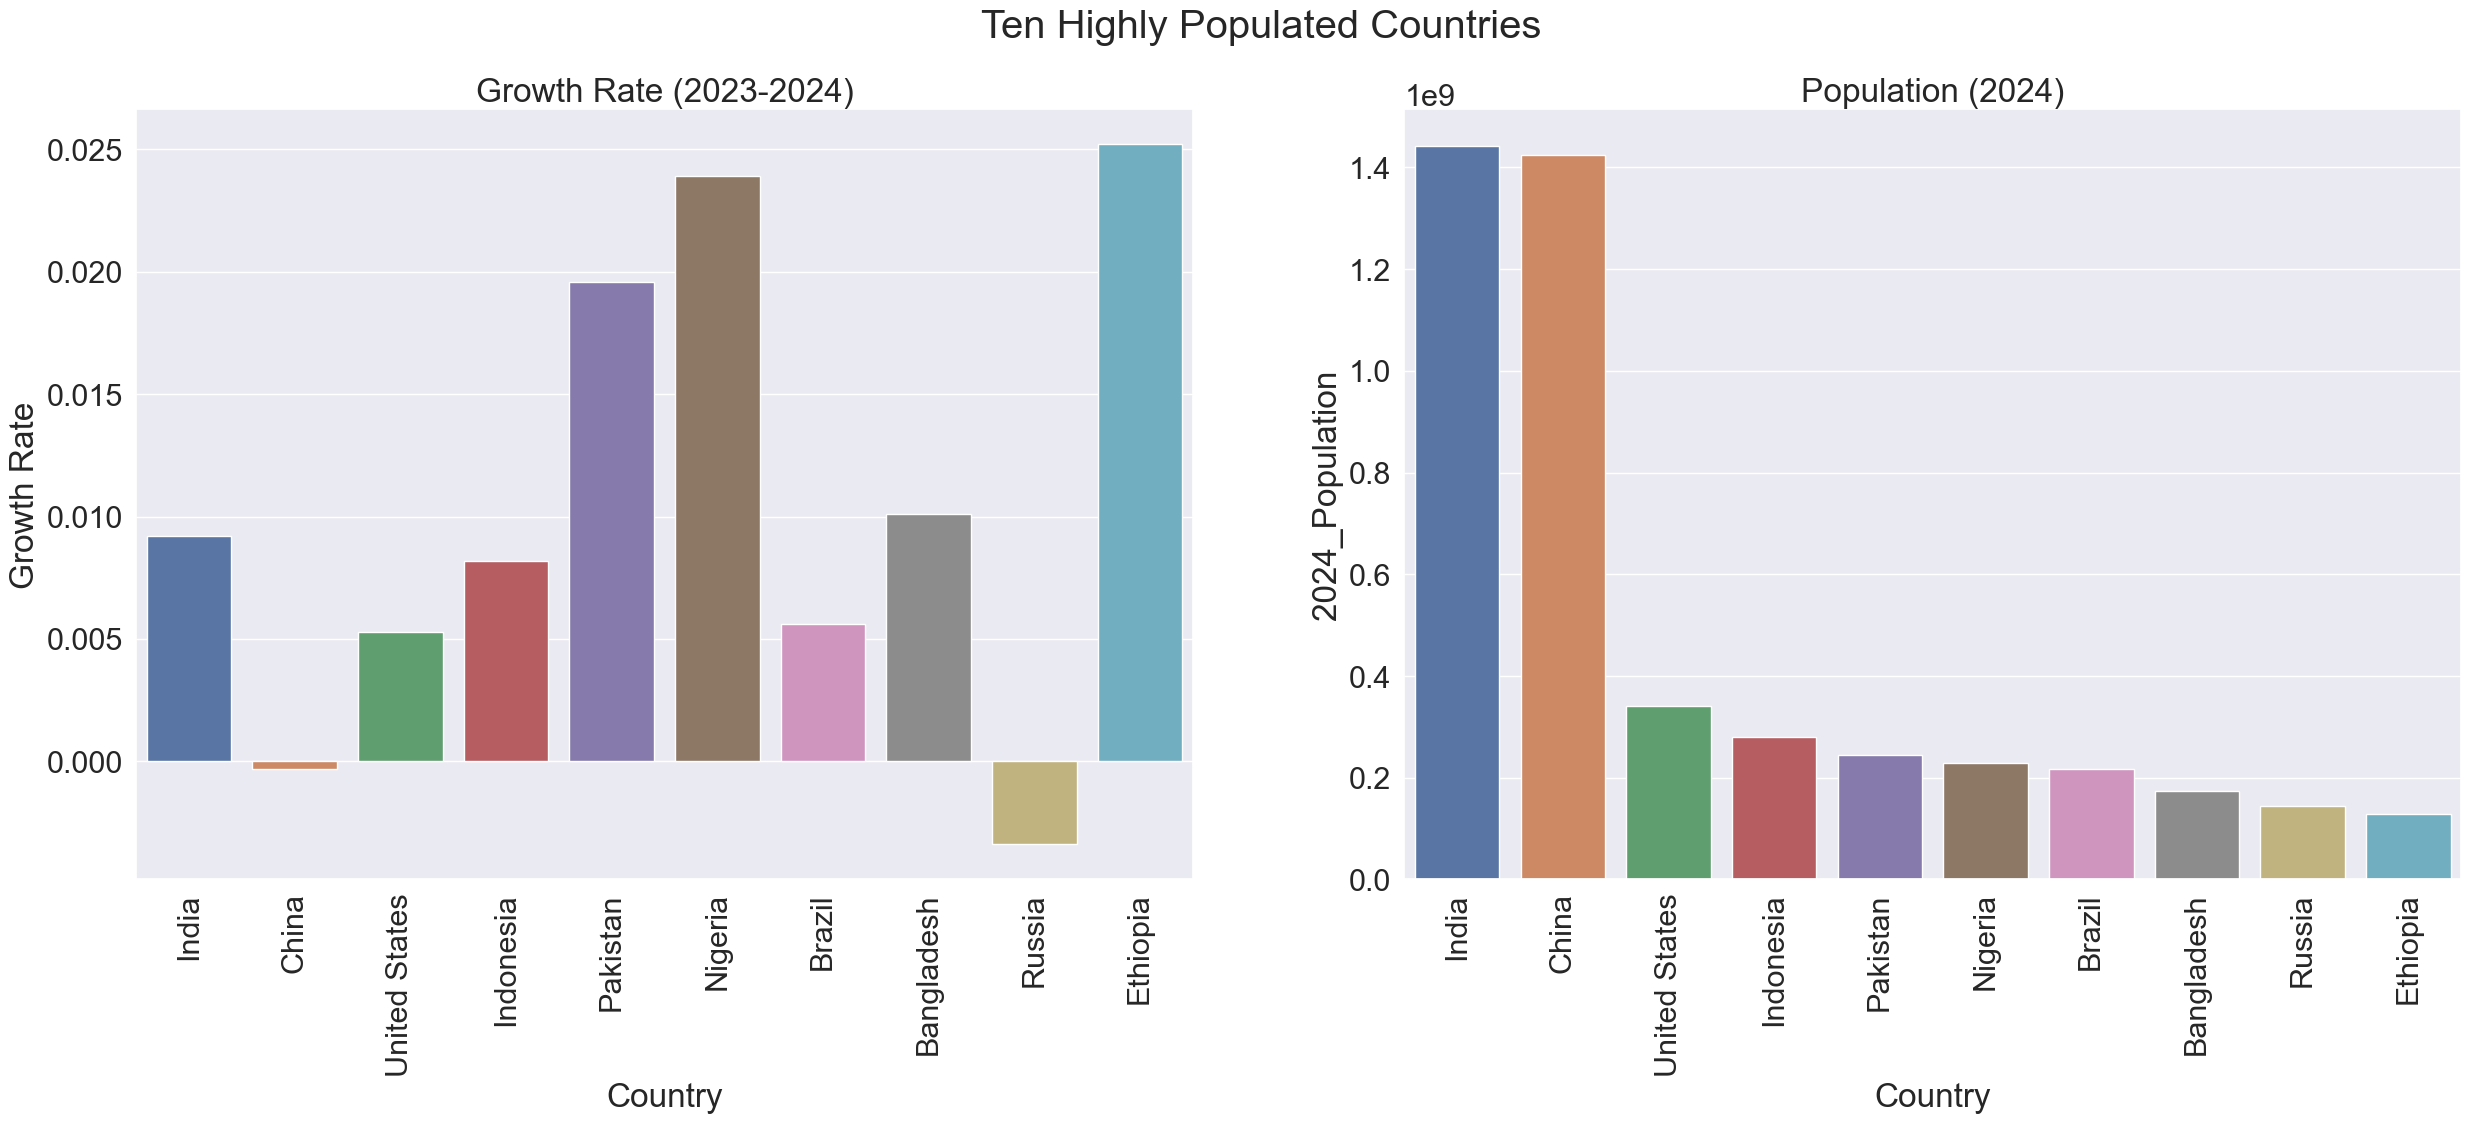

In [75]:
# Growth Rate and population plot for top 10 countries

sns.set(font_scale=2)
fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = a1, ax=ax[0])
sns.barplot(x ="Country",y = "2024_Population",data =a1, ax=ax[1])

ax[0].set_title ("Growth Rate (2023-2024)")
ax[1].set_title("Population (2024)")


ax[0].set_xticklabels(labels = a1["Country"],rotation=90)
ax[1].set_xticklabels(labels = a1["Country"],rotation=90)

plt.suptitle ("Ten Highly Populated Countries")
plt.show()


**From the above graphs, we can interpret that:**

* Occupants of Nigeria and Pakistan are increased by 2.41 and 1.98 percentage respectively
* China and Russia, on the other hand, houses less residents in the Year 2024 as compared to the year 2023

### c) Bottom 10 highly populated Countries

In [77]:
# Employing .tail() method to retrieve bottom 10 records

df3["World Percentage"] = df3["World Percentage"].fillna(0)
a2= df3.tail(10)
a2


,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
224,Nauru,12780,12884,21.00,0.0081,0.0,644.2000,225
225,Tuvalu,11396,11478,26.00,0.0072,0.0,382.6000,226
226,Wallis and Futuna,11502,11439,274.00,-0.0055,0.0,41.7482,227
227,Saint Barthelemy,10994,11019,21.00,0.0023,0.0,440.7600,228
228,Saint Pierre and Miquelon,5840,5815,242.00,-0.0043,0.0,24.0289,229
229,Montserrat,4386,4372,102.00,-0.0032,0.0,42.8627,230
230,Falkland Islands,3791,3803,12173.00,0.0032,0.0,0.3124,231
231,Niue,1935,1935,261.00,0.0000,0.0,7.4138,232
232,Tokelau,1893,1915,12.00,0.0116,0.0,191.5000,233
233,Vatican City,518,526,0.44,0.0154,0.0,1195.4545,234


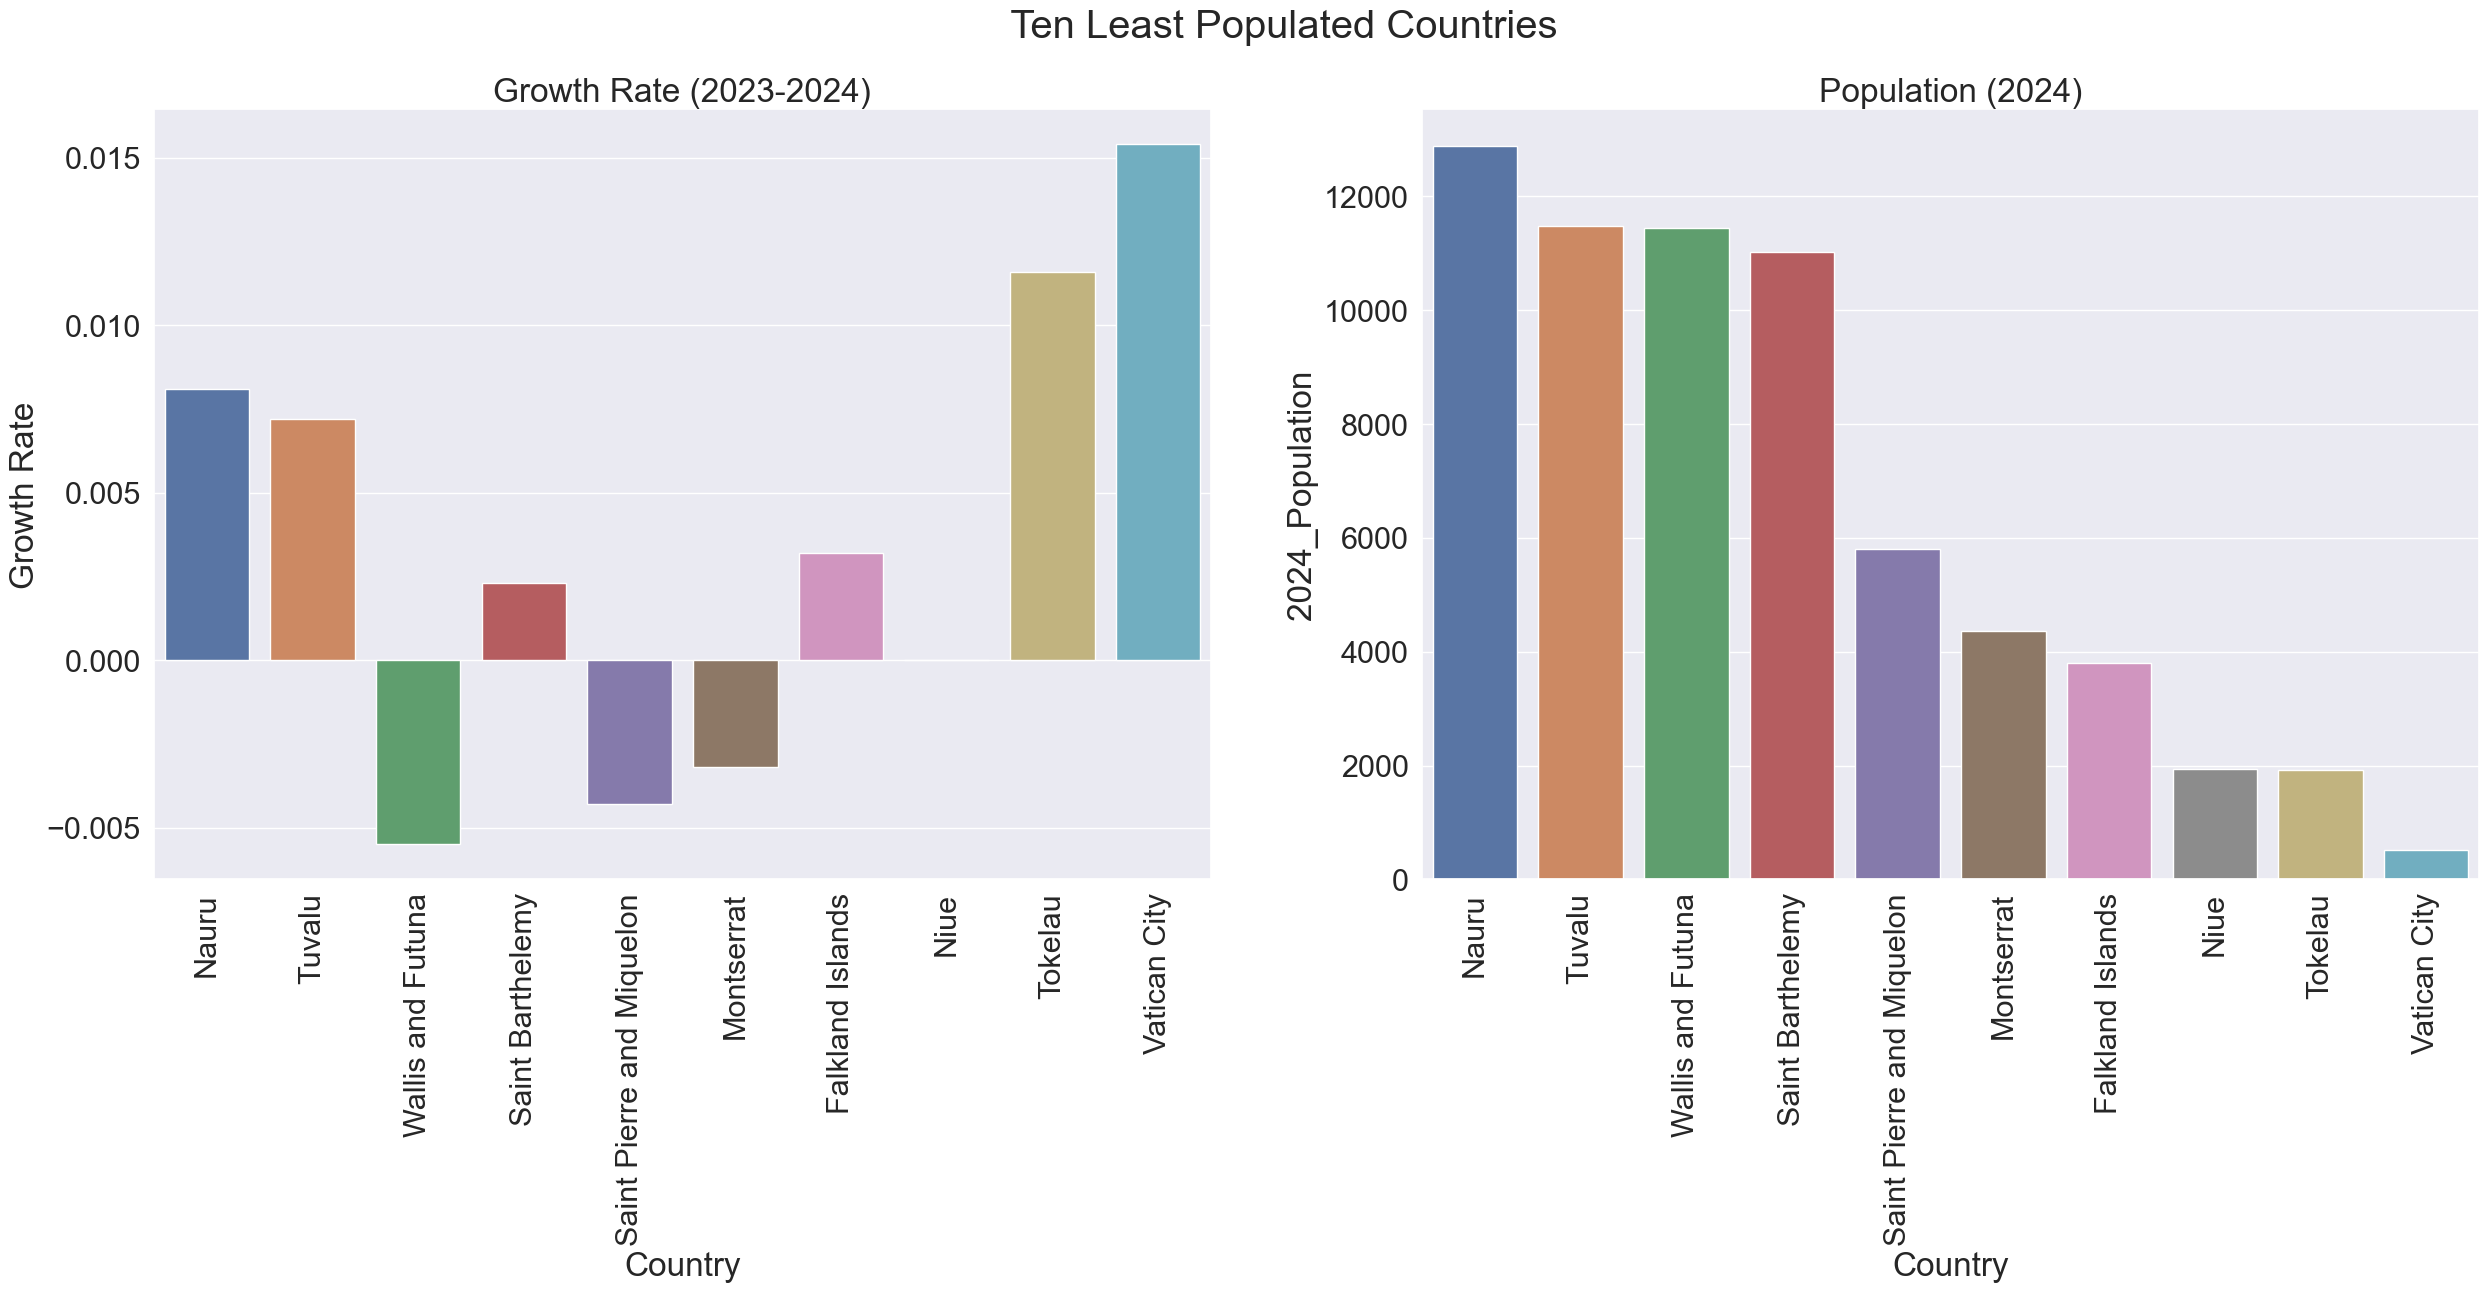

In [78]:
# Plotting barplots to depict relationship between current population and growth rates 
#of top 10 least populous contries

sns.set(font_scale=2)

fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = a2, ax=ax[0])

sns.barplot(x ="Country",y = "2024_Population",data =a2, ax=ax[1])

ax[0].set_title ("Growth Rate (2023-2024)")
ax[1].set_title("Population (2024)")
ax[0].set_xticklabels(labels = a2["Country"],rotation=90)
ax[1].set_xticklabels(labels = a2["Country"],rotation=90)
plt.suptitle (" Ten Least Populated Countries")
plt.show()

**Froom the above graphs, we can depict that**

* Vatican city, tiniest country in the world, shows a climb in growth rate by 1.57 percentage
* Wallis & Futuna's(dependent territory), Saint Pierre & Miquelon's and Montserrat's population size has futher shrinked.

### d) Countries and dependencies with positive growth rates 

In [79]:
positive_g = df3[df3["Growth Rate"] >0].sort_values("Growth Rate",ignore_index = True, ascending = False)
positive_g

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,Syria,23227014,24348053,185180.0,0.0483,0.0030,132.5930,57
1,Niger,27202843,28238972,1267000.0,0.0381,0.0035,22.2933,54
2,DR Congo,102262808,105625114,2344858.0,0.0329,0.0132,46.5914,15
3,Ukraine,36744634,37937821,603500.0,0.0325,0.0047,65.4778,40
4,Chad,18278568,18847148,1284000.0,0.0311,0.0024,14.9676,67
...,...,...,...,...,...,...,...,...
184,Gibraltar,32688,32718,6.8,0.0009,0.0000,4811.4706,219
185,Czech Republic,10495295,10503734,78865.0,0.0008,0.0013,136.0614,90
186,Finland,5545475,5549886,338424.0,0.0008,0.0007,18.2598,118
187,Hong Kong,7491609,7496681,1104.0,0.0007,0.0009,7139.6962,104


[]

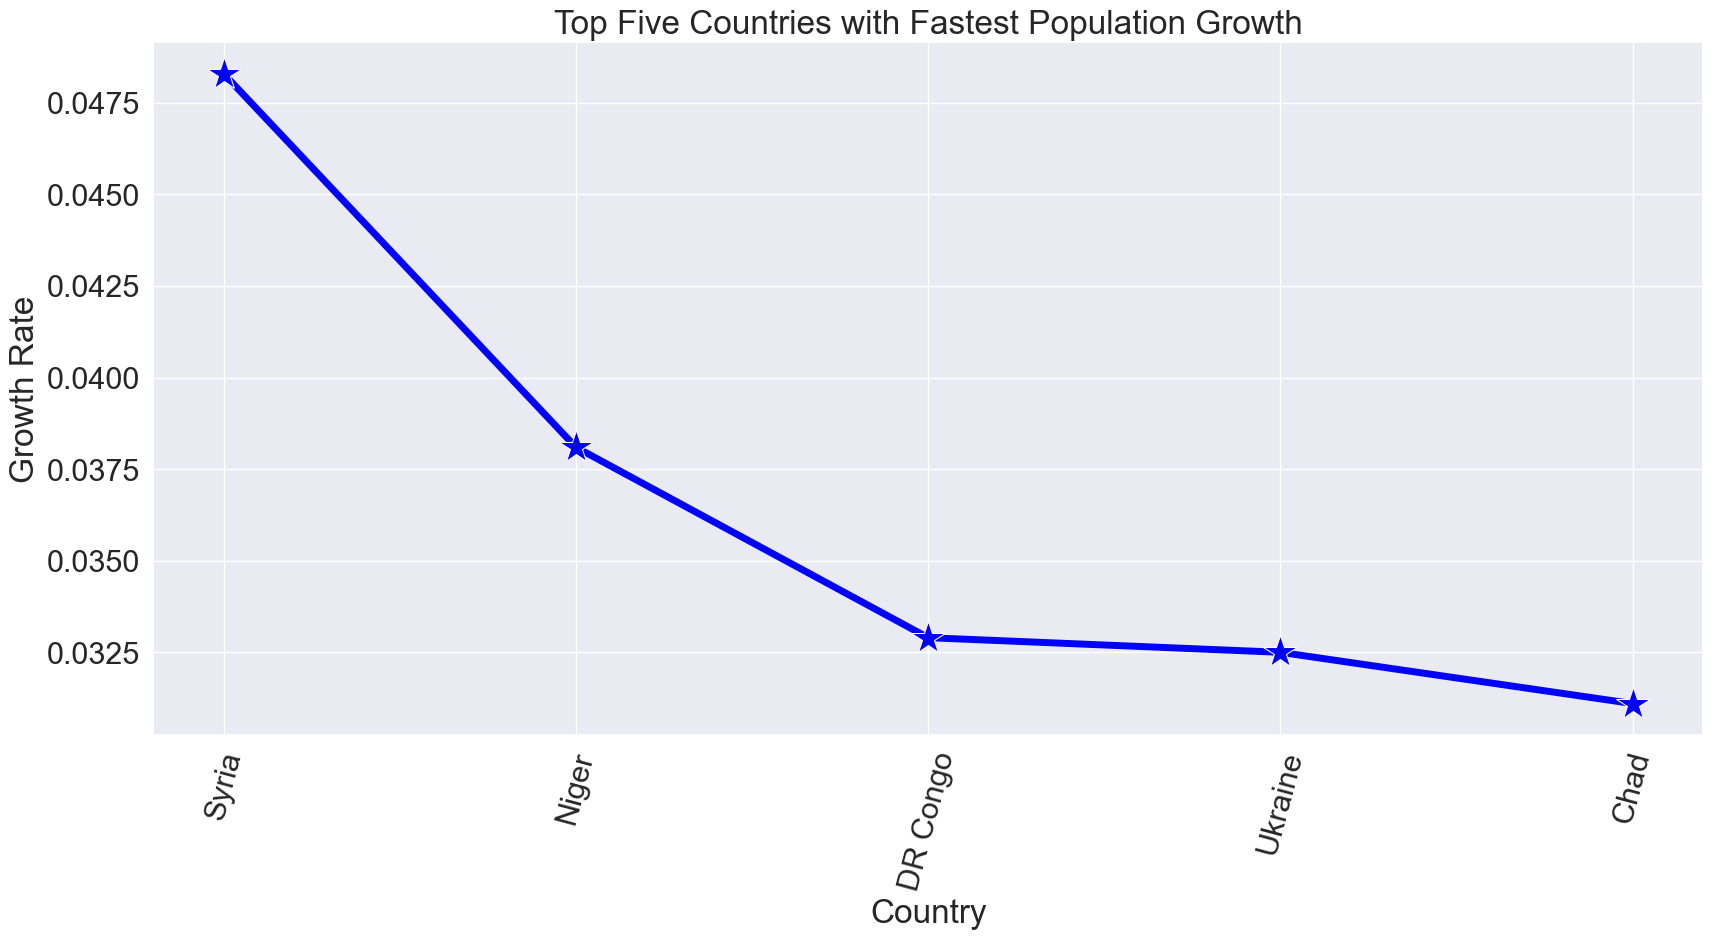

In [80]:
# Plotting lineplot to demostrate growth rate of top 5 fastest growing countries in terms of population size

plt.figure(figsize =(20,9))
sns.lineplot(data = positive_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "blue",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()

**From the above analysis we can assess that:**

* Syria is the top countrie with the elevated growth rate of 4.98 percentage

### e) Countries and dependencies with negative growth rates

In [81]:
negative_g = df3[df3["Growth Rate"] <0].sort_values("Growth Rate",ignore_index = True)
negative_g

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,Moldova,3435931,3329865,33846.00,-0.0309,0.0004,101.2591,135
1,Lebanon,5353930,5219044,10452.00,-0.0252,0.0007,510.1705,124
2,Poland,41026067,40221726,312679.00,-0.0196,0.0050,131.3877,37
3,Hungary,10156239,9994993,93028.00,-0.0159,0.0012,109.5222,95
4,Slovakia,5795199,5702832,49037.00,-0.0159,0.0007,116.3013,117
5,Romania,19892812,19618996,238391.00,-0.0138,0.0025,85.2703,66
6,Latvia,1830211,1810240,64559.00,-0.0109,0.0002,29.0895,151
7,Bulgaria,6687717,6618615,110879.00,-0.0103,0.0008,60.9673,110
8,Lithuania,2718352,2692798,65300.00,-0.0094,0.0003,43.0022,144
9,American Samoa,43914,43544,199.00,-0.0084,0.0000,217.7200,214


[]

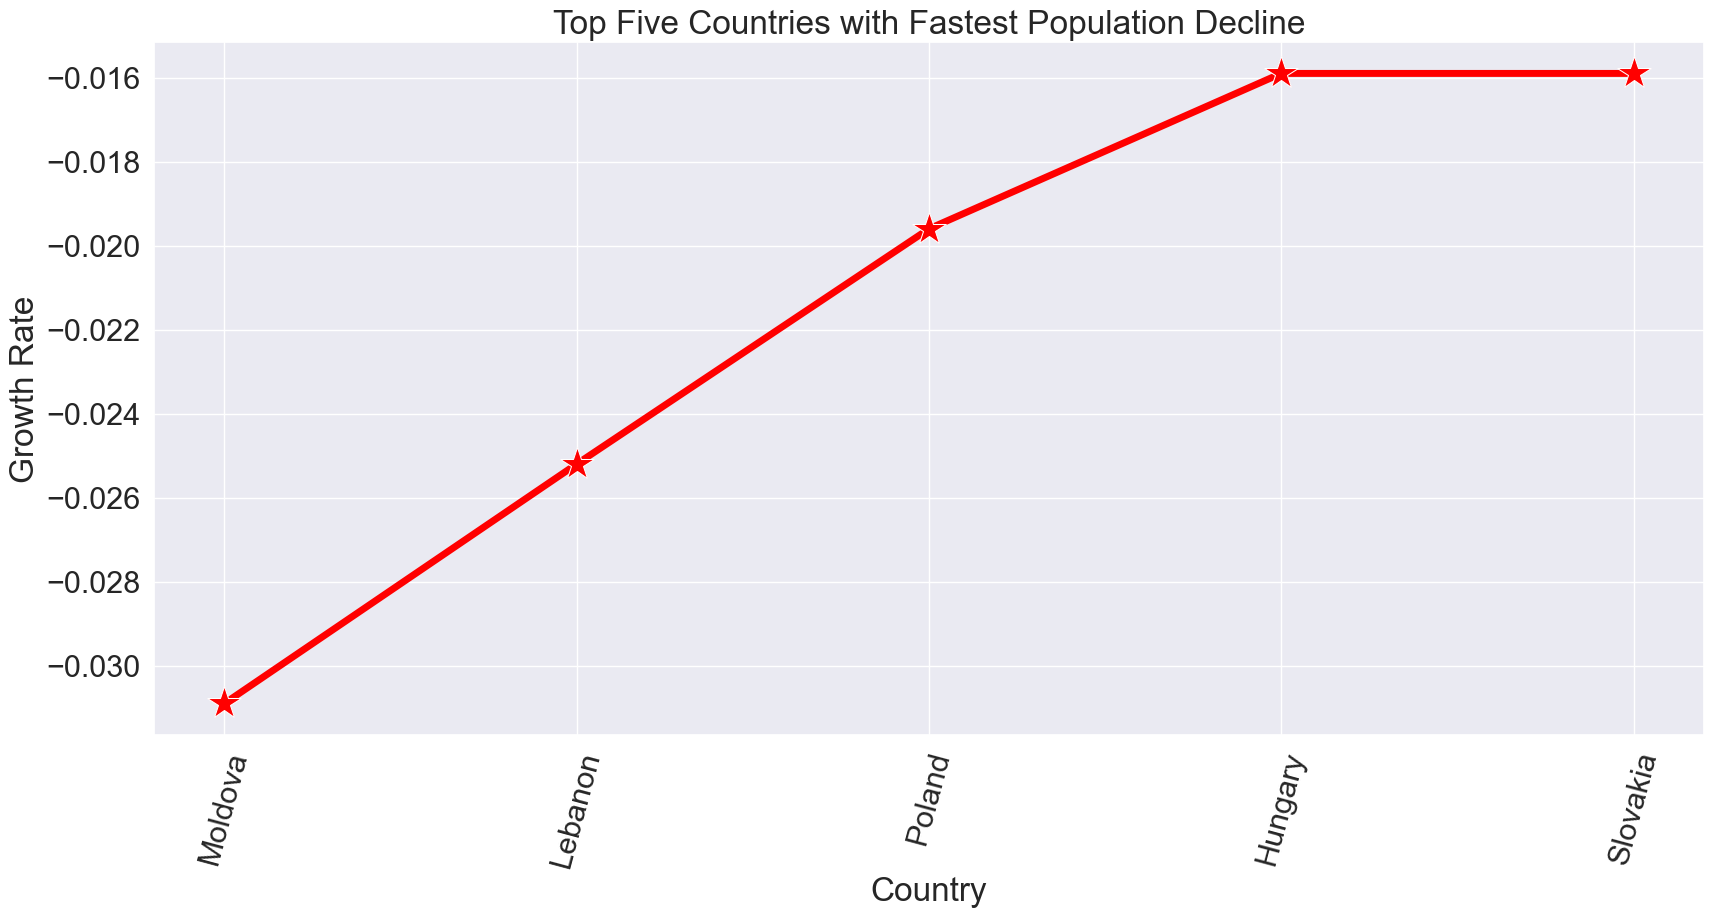

In [82]:
# Plotting lineplot to demostrate growth rate of top 5 fastest population decline

plt.figure(figsize =(20,9))
sns.lineplot(data = negative_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "red",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Decline")
plt.plot()

**Above analysis clearly depicts that:**

* There are total 43 countries/dependant teritorries with negative growth rate
* Population of Maldova has decreased tremendously followed by Lebanon

### f) Countries with 100 million population 

In [84]:
 df3[df3["2024_Population"] > 100000000 ].sort_values("Rank",ignore_index = False)


,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,India,1428627663,1441719852,3287590.0,0.0092,0.1801,484.9067,1
1,China,1425671352,1425178782,9706961.0,-0.0003,0.1780,151.2174,2
2,United States,339996563,341814420,9372610.0,0.0053,0.0427,37.3673,3
3,Indonesia,277534122,279798049,1904569.0,0.0082,0.0350,149.0254,4
4,Pakistan,240485658,245209815,881912.0,0.0196,0.0306,318.0908,5
5,Nigeria,223804632,229152217,923768.0,0.0239,0.0286,251.6027,6
6,Brazil,216422446,217637297,8515767.0,0.0056,0.0272,26.0390,7
7,Bangladesh,172954319,174701211,147570.0,0.0101,0.0218,1342.1004,8
8,Russia,144444359,143957079,17098242.0,-0.0034,0.0180,8.7903,9
9,Ethiopia,126527060,129719719,1104300.0,0.0252,0.0162,114.9415,10


* Total 15 countries in the world holds more than 100 million individuals
* India, China, United States, Indonesia and Pakistan are the top countries with more than 100 million population

### g) Top five highly and least densed countries or depedencies in the world

In [85]:
density =df3.sort_values("Density(/km²)", ignore_index = True,ascending = False)
density

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,Macau,704149,713082,32.90,0.0127,0.0001,21674.2249,167
1,Monaco,36297,36157,2.02,-0.0039,0.0000,18078.5000,217
2,Singapore,6014723,6052709,710.00,0.0063,0.0008,8429.9568,114
3,Hong Kong,7491609,7496681,1104.00,0.0007,0.0009,7139.6962,104
4,Gibraltar,32688,32718,6.80,0.0009,0.0000,4811.4706,219
...,...,...,...,...,...,...,...,...
229,Namibia,2604172,2645805,825615.00,0.0160,0.0003,3.2137,145
230,Western Sahara,587259,598385,266000.00,0.0189,0.0001,2.2496,172
231,Mongolia,3447157,3493629,1564110.00,0.0135,0.0004,2.2431,133
232,Falkland Islands,3791,3803,12173.00,0.0032,0.0000,0.3124,231


In [86]:
# Top 5 highly dense countries

d1 = density.head()
d1

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,Macau,704149,713082,32.90,0.0127,0.0001,21674.2249,167
1,Monaco,36297,36157,2.02,-0.0039,0.0000,18078.5000,217
2,Singapore,6014723,6052709,710.00,0.0063,0.0008,8429.9568,114
3,Hong Kong,7491609,7496681,1104.00,0.0007,0.0009,7139.6962,104
4,Gibraltar,32688,32718,6.80,0.0009,0.0000,4811.4706,219


In [87]:
# Top 5 least dense countries

d2 =density.tail()
d2

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
229,Namibia,2604172,2645805,825615.0,0.0160,0.0003,3.2137,145
230,Western Sahara,587259,598385,266000.0,0.0189,0.0001,2.2496,172
231,Mongolia,3447157,3493629,1564110.0,0.0135,0.0004,2.2431,133
232,Falkland Islands,3791,3803,12173.0,0.0032,0.0000,0.3124,231
233,Greenland,56643,56789,2166086.0,0.0026,0.0000,0.1384,208


In [92]:
# Concatting both the records

d = pd.concat([d1, d2], ignore_index=True)
d

,Country,2023_Population,2024_Population,Area(km²),Growth Rate,World Percentage,Density(/km²),Rank
0,Macau,704149,713082,32.90,0.0127,0.0001,21674.2249,167
1,Monaco,36297,36157,2.02,-0.0039,0.0000,18078.5000,217
2,Singapore,6014723,6052709,710.00,0.0063,0.0008,8429.9568,114
3,Hong Kong,7491609,7496681,1104.00,0.0007,0.0009,7139.6962,104
4,Gibraltar,32688,32718,6.80,0.0009,0.0000,4811.4706,219
5,Namibia,2604172,2645805,825615.00,0.0160,0.0003,3.2137,145
6,Western Sahara,587259,598385,266000.00,0.0189,0.0001,2.2496,172
7,Mongolia,3447157,3493629,1564110.00,0.0135,0.0004,2.2431,133
8,Falkland Islands,3791,3803,12173.00,0.0032,0.0000,0.3124,231
9,Greenland,56643,56789,2166086.00,0.0026,0.0000,0.1384,208


Text(0.5, 1.0, 'Relation Between Density and Population')

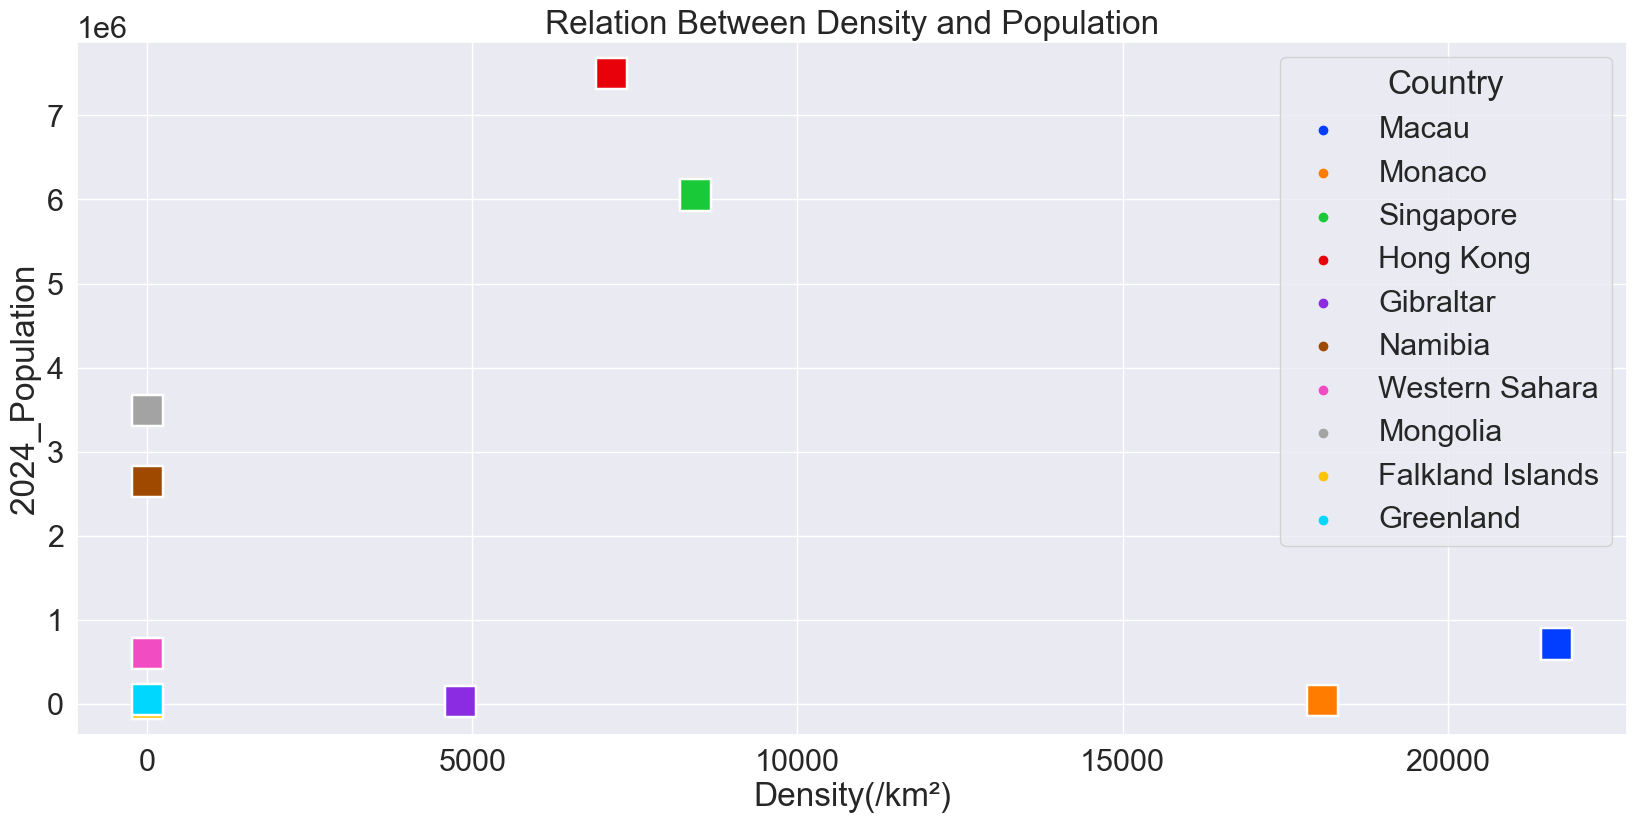

In [94]:
# Plotting scatterplot to explore relationship between Density and Population

plt.figure(figsize =(20,9))
sns.scatterplot( x = "Density(/km²)", y = "2024_Population",data = d, hue = "Country", s= 500,marker = "s",palette ="bright")
plt.title("Relation Between Density and Population")

**Above plot displays the relationship between top five and bottom five countries in terms of population density and population size**

It illustrates that:

* Population density is defined as average number of individuals in a population per unit of area
* If an area is densely populated, that means a larger number of people live in a smaller amount of space
* Monaco,a dependency, is higly densed and packed with mere population of 36157 residents
* Greenland contains a massive land area to hold its small size population of 56789

#### Summary

* According to the U.S. Census Bureau's estimates, as of January 1, 2024, the anticipated global population is 8,019,876,189. This marks a rise of 75,162,541 individuals or a growth rate of 0.95% compared to the population on New Year's Day in 2023. In the month of January 2024, it is projected that there will be approximately 4.3 births and 2.0 deaths happening every second worldwide.
* China and India are the most heavily populous countries in the World
* About 36 % of the World population resides just in India and China
* Suprisingly,population of China declined by -0.03 percentage as of Jan 2024 comapared to the previous year 
* Vatican City,smallest country in the world in terms of both population and total area, accomodates barely 526 residents
* China and India, despite their immense populations, do not rank among the most densely populated nations because their vast landmasses prevent them from having the highest population density.
* Mocau is the world's most densely populated place
* Syria and Niger are the top two countries with the elevated growth rate of 4.98 and 3.98 percentage


Based on information from the United Nations, population growth and decline are shaped by significant factors such as rising fertility rates, extended life expectancy, international conflicts, and migration patterns between countries.